# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.
Two of the most frequent travel annoyances are flight delays and cancellations, but what if we could predict the likelihood of a flight being delayed in advance? What if there was a connecting flight? Machine Learning models could forecast airline delays. Knowing the likelihood of a flight delay or cancellation is an essential tool for travelers. Whether the delays were caused by a timely factor, such as the weather, or not can be determined by leveraging a machine learning algorithm. Machine learning essentially automates the Data Analysis process and generates real-time predictions based on data without the need for human interaction. This is where the world is aggreeing upon ML as an appropriate solution.

### 2. Formulate the business problem, success metrics, and desired ML output.
The main business problem here is whether the flight will be delayed based on the dependent features. It may be due to weather, airlines/carriers,departure delays due to loading issues and so on. Accuracy is the basic metric used for any classification problem which can predict correctly on the delayed/not delayed flights. The desired Machine Learning output could be the flight is Mostly delayed, Mostly not delayed, definitely delayed, definitely not delayed.

### 3. Identify the type of ML problem you’re dealing with.
 We are dealing with a supervised learning problem in machine learning that entails class label prediction in classification. Basically, the forecast involves determining whether or not the specified airline will be delayed.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [87]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [2]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = r'D:\DataScience\Final_DSTS\data_compressed'
base_path = r'D:\DataScience\Final_DSTS'
csv_base_path = r'D:\DataScience\Final_DSTS\data'

!mkdir data {csv_base_path}

A subdirectory or file data already exists.
Error occurred while processing: data.
A subdirectory or file D:\DataScience\Final_DSTS\data already exists.
Error occurred while processing: D:\DataScience\Final_DSTS\data.


In [409]:
# How many zip files do we have? write a code to answer it.

print("The number of zip files are", len([entry for entry in os.listdir(zip_path) if os.path.isfile(os.path.join(zip_path, entry))]))

The number of zip files are 60


In [6]:
#picking and saving all the zip files path
zip_files = [os.path.join(zip_path, entry) for entry in os.listdir(zip_path) if os.path.isfile(os.path.join(zip_path, entry))]
zip_files[0]


'D:\\DataScience\\Final_DSTS\\data_compressed\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip'

#### Extract CSV files from ZIP files

In [8]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')


for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting D:\DataScience\Final_DSTS\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting D:\DataScience\Final_DSTS\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting D:\DataScience\Final_DSTS\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting D:\DataScience\Final_DSTS\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting D:\DataScience\Final_DSTS\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting D:\DataScience\Final_DSTS\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting D:\DataScience\Final_DSTS\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting D:\DataScience\Final_DSTS\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extra

In [12]:
# How many csv files have we extracted? write a code to answer it.
print(len([entry for entry in os.listdir(csv_base_path) if os.path.isfile(os.path.join(csv_base_path, entry))]))

61


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [86]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [410]:


df_temp = pd.read_csv(os.path.join(csv_base_path, 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv'))
df_temp.head(6)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                          9E      N908XJ  ...   
1                     20363                          9E      N315PQ  ...   
2                     20363                          9E      N582CA  ...   
3                     20363                          9E      N292PQ  ...   
4                     20363                          9E      N600LR  ...   
5                     20363                          9E      N316PQ  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID Div5WheelsOn  \
0          NaN          NaN            NaN               NaN          NaN   
1          NaN          NaN            NaN               NaN          NaN   
2          NaN          NaN            NaN               NaN          NaN   
3          NaN          NaN            NaN               NaN          NaN   
4          NaN          NaN            NaN               NaN          NaN   
5          NaN          NaN            NaN               NaN          NaN   

  Div5TotalGTime Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0            NaN              NaN            NaN         NaN           NaN  
1            NaN              NaN            NaN         NaN           NaN  
2            NaN              NaN            NaN         NaN           NaN  
3            NaN              NaN            NaN         NaN           NaN  
4            NaN              NaN            NaN         NaN           NaN  
5            NaN              NaN            NaN         NaN           NaN  

[6 rows x 110 columns]

**Question**: Print the row and column length in the dataset, and print the column names.

In [54]:
df_shape =df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [55]:
# Enter your code here
print(f'The first 10 rows of the dataset')
df_temp.head(10)


The first 10 rows of the dataset


Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                          9E      N908XJ  ...   
1                     20363                          9E      N315PQ  ...   
2                     20363                          9E      N582CA  ...   
3                     20363                          9E      N292PQ  ...   
4                     20363                          9E      N600LR  ...   
5                     20363                          9E      N316PQ  ...   
6                     20363                          9E      N916XJ  ...   
7                     20363                          9E      N371CA  ...   
8                     20363                          9E      N601LR  ...   
9                     20363                          9E      N906XJ  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID Div5WheelsOn  \
0          NaN          NaN            NaN               NaN          NaN   
1          NaN          NaN            NaN               NaN          NaN   
2          NaN          NaN            NaN               NaN          NaN   
3          NaN          NaN            NaN               NaN          NaN   
4          NaN          NaN            NaN               NaN          NaN   
5          NaN          NaN            NaN               NaN          NaN   
6          NaN          NaN            NaN               NaN          NaN   
7          NaN          NaN            NaN               NaN          NaN   
8          NaN          NaN            NaN               NaN          NaN   
9          NaN          NaN            NaN               NaN          NaN   

  Div5TotalGTime Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0            NaN              NaN            NaN         NaN           NaN  
1            NaN              NaN            NaN         NaN           NaN  
2            NaN              NaN            NaN         NaN           NaN  
3            NaN              NaN            NaN         NaN           NaN  
4            NaN              NaN            NaN         NaN           NaN  
5            NaN              NaN            NaN         NaN           NaN  
6            NaN              NaN            NaN         NaN           NaN  
7            NaN              NaN            NaN         NaN           NaN  
8            NaN              NaN            NaN         NaN           NaN  
9            NaN              NaN            NaN         NaN           NaN  

[10 rows x 110 columns]

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [56]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:# **ENTER YOUR CODE HERE**
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [57]:
# Enter your code here
print('Columns in the dataset that contain the word Del')
[x for x in df_temp.columns if 'Del' in x]

Columns in the dataset that contain the word Del


['DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'DivArrDelay']

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [58]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", df_temp.shape[0] , " and ", df_temp.shape[1])
print("The years in this dataset are: ", df_temp['Year'].nunique())
print("The months covered in this dataset are: ", df_temp['Month'].nunique())
print("The date range for data is :" , min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))
print("The airlines covered in this dataset are: ", list(np.unique(df_temp[['Reporting_Airline']].values)))
print("The Origin airports covered are: ",  list(np.unique(df_temp[['Origin']].values)))
print("The Destination airports covered are: ", list(np.unique(df_temp[['Dest']].values)))

The #rows and #columns are  585749  and  110
The years in this dataset are:  1
The months covered in this dataset are:  1
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH', 'OO', 'UA', 'WN', 'YV', 'YX']
The Origin airports covered are:  ['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY', 'ADK', 'ADQ', 'AEX', 'AGS', 'ALB', 'ALO', 'AMA', 'ANC', 'APN', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZA', 'AZO', 'BDL', 'BET', 'BFF', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BKG', 'BLI', 'BLV', 'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRD', 'BRO', 'BRW', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CAE', 'CAK', 'CDC', 'CDV', 'CGI', 'CHA', 'CHO', 'CHS', 'CID', 'CIU', 'CKB', 'CLE', 'CLL', 'CLT', 'CMH', 'CMI', 'CMX', 'CNY', 'COD', 'COS', 'COU', 'CPR', 'CRP', 'CRW', 'CSG', 'CVG', 'CWA', 'DAB', 'DAL', 'DAY', 'DBQ', 'DCA', 'DEN', 'DFW', 'DHN', 'DLH

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [59]:
counts = pd.DataFrame({'Origin': df_temp['Origin'].value_counts() , 'Destination':df_temp['Dest'].value_counts()})
counts

Origin  Destination
ABE     303          303
ABI     169          169
ABQ    2077         2076
ABR      60           60
ABY      79           79
..      ...          ...
WRG      60           60
WYS      52           52
XNA    1004         1004
YAK      60           60
YUM      96           96

[346 rows x 2 columns]

**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [60]:
counts.sort_values(by=['Origin','Destination'],ascending=False).head(15)# Enter your code here

Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877

### **Question**: Given all the information about a flight trip, can you predict if it would be delayed?
Yes definitely, Flights trip can be predicted based on various indicators. How well we predict based on the important features and how well the model will perform defines the correctness of the prediction.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [62]:

def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
   # csv_files = csv_files[0:3]
    # Create an empty dataframe
    df = pd.DataFrame()
    for filename in csv_files:
        if filename.endswith('.csv'):
            curr_df = pd.read_csv(filename, header = [0], low_memory = False,  lineterminator='\n', error_bad_lines=False)
            
            ## Filtered dataset
            filtered_df = curr_df[filter_cols]
            
            #subset cols based on Origin and Dest and given values
            subset_DatFrame = filtered_df[filtered_df[subset_cols[0]].isin(subset_vals[0]) & filtered_df[subset_cols[1]].isin(subset_vals[1])]
            #subset cols based on Reporting_Airline and given values                                                             
            subset_DatFrame = subset_DatFrame[subset_DatFrame[subset_cols[2]].isin(subset_vals[2])]
                                                                                                        
            df = pd.concat([df,subset_DatFrame], ignore_index = True)  
     
    

    # Finally save the data frame into a csv file.
    df.to_csv(file_name, index = False)
    
            

In [63]:
#cols is the list of columns to predict Arrival Delay 
filter_cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [133]:
start = time.time()

csv_files = [os.path.join(csv_base_path, entry) for entry in os.listdir(csv_base_path) if os.path.isfile(os.path.join(csv_base_path, entry))]
csv_files


file_name = f"{base_path}\\combined_files.csv"


# < write code to call the combined_csv function>
#combine_csv(csv_files,subset_cols)
combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 5.18 minutes


#### Load dataset

Load the combined dataset.

In [3]:
data = pd.read_csv(os.path.join(base_path, "combined_files.csv"))# Enter your code here to read the combined csv file.

Print the first 5 records.

In [4]:
# Enter your code here 
data.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  AirTime  
0     689.0              3     -20.0              0.0       0.0     99.0  
1     731.0              3      -3.0              0.0       0.0     98.0  
2    1199.0              5      -7.0              0.0       0.0    174.0  
3    1587.0              7      -4.0              0.0       0.0    233.0  
4    1587.0              7     -13.0              0.0       0.0    179.0

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [5]:
# to answer above questions, complete the following code
print("The #rows and #columns are ",data.shape[0] , " and ", data.shape[1])
print("The years in this dataset are: ", list(data['Year'].unique()))
print("The months covered in this dataset are: ", sorted(list(data['Month'].unique())))
print("The date range for data is :" , min(data['FlightDate']), " to ", max(data['FlightDate']))
print("The airlines covered in this dataset are: ", list(np.unique(data[['Reporting_Airline']].values)))
print("The Origin airports covered are: ", list(np.unique(data[['Origin']].values)))
print("The Destination airports covered are: ", list((np.unique(data[['Dest']].values))))


The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014, 2015, 2016, 2017, 2018]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['AA', 'DL', 'OO', 'UA', 'WN']
The Origin airports covered are:  ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']
The Destination airports covered are:  ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [6]:
data.rename(columns={'ArrDel15':'is_delay'}, inplace=True) # Enter your code here

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [7]:
# Enter your code here
pd.isnull(data).sum(axis=0)

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [8]:
### Remove null columns
data = data[~data['ArrDelay'].isnull()]
data.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  is_delay  AirTime  
0     689.0              3     -20.0              0.0       0.0     99.0  
1     731.0              3      -3.0              0.0       0.0     98.0  
2    1199.0              5      -7.0              0.0       0.0    174.0  
3    1587.0              7      -4.0              0.0       0.0    233.0  
4    1587.0              7     -13.0              0.0       0.0    179.0

Get the hour of the day in 24-hour time format from CRSDepTime.

In [9]:
data['DepHourofDay'] = np.trunc(data['CRSDepTime']/100).astype(int)
data['DepHourofDay']

0          21
1           9
2          18
3          16
4           7
           ..
1658125    11
1658126     8
1658127    12
1658128    22
1658129    16
Name: DepHourofDay, Length: 1635590, dtype: int32

In [10]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

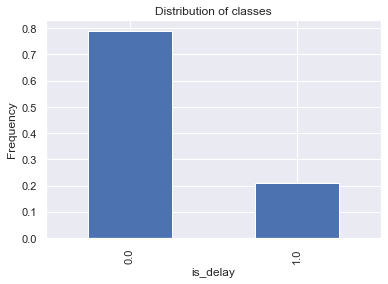

In [419]:
(data.groupby(['is_delay']).size()/len(data) ).plot(kind='bar')# Enter your code here
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

### The number of flights got delayed is lesser (20%) than the number of flights didnot get delayed(almost 80%).


**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

In [237]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

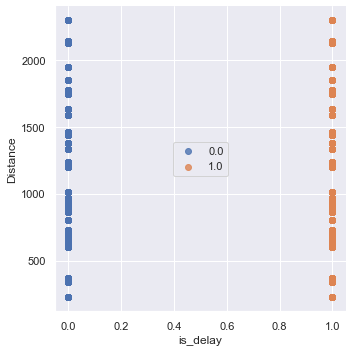

In [238]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

#### Based on the above figures, Which months have the most delays?
June is having the highest number of delays. May, July and August are with a small difference when compared to June.


#### What time of the day has the most delays?
At 8PM is the time most delayes happend.

#### What day of the week has the most delays?
Monday, thursday, Friday and Sunday are the days , the flights are mostly delayed

#### Which airline has the most delays?
WN has the highest followed by OO airline has the most delayes

#### Which origin and destination airports have the most delays?
ORD origin and SFO Destination has most delays.

#### Is flight distance a factor in the delays?
It is not a matter of distance as it is proven in the graph both delayed and non delayed flights shows similar pattern

### Features

Look at all the columns and what their specific types are.

In [420]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [421]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int32
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [11]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [12]:
data.dtypes

is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay         category
dtype: object

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [13]:
data_dummies = pd.get_dummies(data[categorical_columns[:-1]], drop_first=True) # Enter your code here
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [14]:
len(data)


1635590

In [15]:
len(data.columns)

72

In [16]:
#data.columns.difference(data_orig.columns)
data.columns

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [17]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [24]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B
file_name = f"{base_path}\\combined_csv_v1.csv"
data.to_csv(file_name, index = False)

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [18]:
# write Code here to split data into train, validate and test
from sklearn.model_selection import train_test_split
x = data.loc[ : , data.columns != 'target']
y = data['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Baseline classification model

In [19]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression model
clf = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
# train the model on training dataset
clf.fit(x_train, y_train)
clf_predicton = clf.predict(x_test)
clf_pred_TrainData = clf.predict(x_train)
# get accuracy score on test set
clf.score(x_test, y_test)
predicted_prob = clf.predict_proba(x_test)[::,1]

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(test_labels, target_predicted):
    confMatrix = confusion_matrix(test_labels, target_predicted)
    plt.figure(figsize=(6,6))
    sns.heatmap(confMatrix.T, square=True, annot=True, fmt='d', cbar=False, cmap='OrRd', linewidths=0.5,
                xticklabels=['Delayed', 'Not_Delayed'],
                yticklabels=['Delayed', 'Not_Delayed'])
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    

In [21]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted):
    FP_rate, TP_rate, _ = metrics.roc_curve(y_test, target_predicted)
    AreaUnderCurve = round(metrics.roc_auc_score(y_test, target_predicted),4)
    
    plt.plot(FP_rate,TP_rate,label="AUC="+str(AreaUnderCurve))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

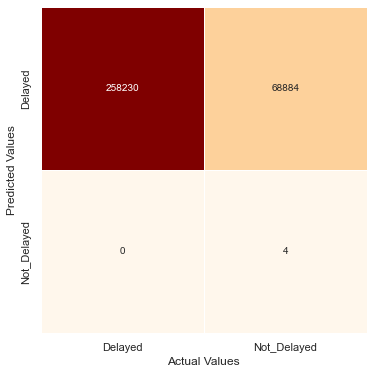

In [22]:
# Enter you code here
plot_confusion_matrix(y_test, clf_predicton)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

In [24]:
# Enter you code here

labels=['Delayed', 'Not_Delayed']
plot_roc(labels, predicted_prob)

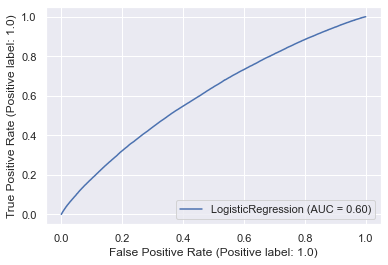

In [25]:
metrics.plot_roc_curve(clf, x_test, y_test)

In [26]:
print(classification_report(y_test, clf_predicton, target_names= ['Delayed', 'Not_Delayed']))

              precision    recall  f1-score   support

     Delayed       0.79      1.00      0.88    258230
 Not_Delayed       1.00      0.00      0.00     68888

    accuracy                           0.79    327118
   macro avg       0.89      0.50      0.44    327118
weighted avg       0.83      0.79      0.70    327118



#### Metrics on the train data prediction

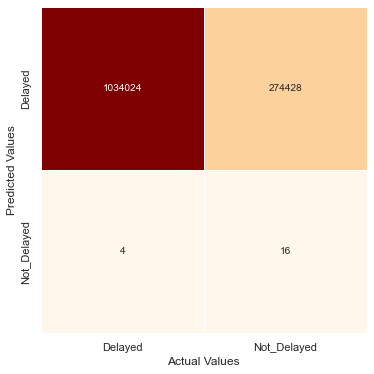

In [27]:
# Enter you code here
labels = ['Delayed', 'Not_Delayed']

plot_confusion_matrix(y_train, clf_pred_TrainData)

In [440]:
print(classification_report(y_train, clf_pred_TrainData, target_names= ['Delayed', 'Not_Delayed']))

              precision    recall  f1-score   support

     Delayed       0.79      1.00      0.88   1033802
 Not_Delayed       0.67      0.00      0.00    274670

    accuracy                           0.79   1308472
   macro avg       0.73      0.50      0.44   1308472
weighted avg       0.76      0.79      0.70   1308472



In [28]:
Conf_matxTest = confusion_matrix(y_test, clf_predicton)

In [39]:
total=sum(sum(Conf_matxTest))

print ('Without Feature Engineering applied\n')

accuracytrain=metrics.accuracy_score(y_train, clf_pred_TrainData) * 100
print ('Accuracy_traindata : ', accuracytrain)

accuracytest=metrics.accuracy_score(y_test, clf_predicton)
print ('Accuracy_testdata : ', accuracytest)

sensitivity = Conf_matxTest[0,0]/(Conf_matxTest[0,0]+Conf_matxTest[0,1])
print('Sensitivity : ', sensitivity )

specificity = Conf_matxTest[1,1]/(Conf_matxTest[1,0]+Conf_matxTest[1,1])
print('Specificity : ', specificity)

F1_Score = Conf_matxTest[0,0]/(Conf_matxTest[0,0]+0.5*(Conf_matxTest[1,0]+Conf_matxTest[0,1]))
print('F1 Score : ', F1_Score)

Precision = (Conf_matxTest[0,0])/(Conf_matxTest[0,0]+ Conf_matxTest[1,0])
print('Precision : ', Precision)


Recall = (Conf_matxTest[0,0])/(Conf_matxTest[0,0]+ Conf_matxTest[0,1])

print('Recall : ', Recall)

Without Feature Engineering applied

Accuracy_traindata :  79.02652865326884
Accuracy_testdata :  0.7894215543015058
Sensitivity :  1.0
Specificity :  5.806526535826269e-05
F1 Score :  0.8823187732342007
Precision :  0.7894189793160794
Recall :  1.0


### Key questions to consider:

#### 1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

As the comparison of accuracy of both the predictions on the train and test dataset shows similar accuracy, we could deduce that both of their performances are matching. 
Simply because the error is understated due to downward bias,  the model typically performs well when tested against the training dataset. We also can expect the training data to give 100% correct predictions due to the reason that the same training dataset is used for training the model.


#### 2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

The goal of testing a model is to determine how well it will make predictions based on data that it hasn't seen. So Testing on the same dataset which is spilt, definitely would be biased to have higher accuracy and precession. At the same time the Accuracy, Precession and recall for the above 2 predictions are same and that is also caused by the fact that the test data is dedeced from the same dataset where we have trin data taken to model the machine.

### 3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 
In my opinion, the business cannot decide to use any product/machine learning model based solely on technical evaluation metrics or the model performance such as the model's accuracy, recall, precision, etc. When conducting business, we need to communicate to the customer in terms of the scenario based accuracy of the model. How better it performs, What is the tollerated error and so on.

The following things that we can utilize to have a strong business point.
Simply restating data in a different format to fit the context of the question can result in new functionality. For instance, a business might convert the flight's departure and arrival times into the total journey time. The algorithm can adapt to the business requirement and produce more actionable results by combining the timestamps into a single new feature.
In order to produce a feature that improves machine learning, users can also combine two features that are individually not very beneficial or somewhat useful. 


#### **Question**: What can you summarize from the confusion matrix?
According to the confusion matrix which is plotted for the prediction on test dataset, the prediction for True positives thatis the delayed flights are classified with 100% correctness. There are no occurences which are predicted as not delayed. There are 68450 false positives which are predicted as  delayed even though they are not delayed. We are concerned here about the flights shouldnt be classified as not delayd when they are really delayed. This is False Negatives and is 0. So overall the model fitting is really in good shape.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [445]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [40]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

holidays[1:5]

['2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04']

In [41]:
data_orig.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest  ... CRSDepTime  Cancelled  Diverted  Distance  \
0    ATL          GA  IAH  ...       2145        0.0       0.0     689.0   
1    DFW          TX  ATL  ...        945        0.0       0.0     731.0   
2    ATL          GA  DEN  ...       1855        0.0       0.0    1199.0   
3    ATL          GA  PHX  ...       1634        0.0       0.0    1587.0   
4    PHX          AZ  ATL  ...        700        0.0       0.0    1587.0   

   DistanceGroup  ArrDelay  ArrDelayMinutes  is_delay  AirTime  DepHourofDay  
0              3     -20.0              0.0       0.0     99.0            21  
1              3      -3.0              0.0       0.0     98.0             9  
2              5      -7.0              0.0       0.0    174.0            18  
3              7      -4.0              0.0       0.0    233.0            16  
4              7     -13.0              0.0       0.0    179.0             7  

[5 rows x 21 columns]

In [42]:
str(data_orig["FlightDate"])

'0          2014-01-26\n1          2014-01-26\n2          2014-01-26\n3          2014-01-26\n4          2014-01-26\n              ...    \n1658125    2018-09-11\n1658126    2018-09-11\n1658127    2018-09-11\n1658128    2018-09-11\n1658129    2018-09-11\nName: FlightDate, Length: 1635590, dtype: object'

In [43]:
data_orig['is_holiday'] = [1 if x in holidays else 0 for x in data_orig["FlightDate"]]

In [44]:
data_orig['is_holiday'].sum()

43912

In [45]:
data_orig["FlightDate"]

0          2014-01-26
1          2014-01-26
2          2014-01-26
3          2014-01-26
4          2014-01-26
              ...    
1658125    2018-09-11
1658126    2018-09-11
1658127    2018-09-11
1658128    2018-09-11
1658129    2018-09-11
Name: FlightDate, Length: 1635590, dtype: object

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [454]:
import pandas as pd
import io
import requests
url="https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31"
url_read=requests.get(url).content
weather_data=pd.read_csv(io.StringIO(url_read.decode('utf-8')))
weather_data

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN
0      USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0
1      USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0
2      USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0
3      USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0
4      USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0
...            ...         ...   ...   ...   ...   ...    ...    ...    ...
16429  USW00013881  2018-12-27    31    41   0.0   0.0   68.0   89.0   39.0
16430  USW00013881  2018-12-28    27   196   0.0   0.0   86.0  144.0   61.0
16431  USW00013881  2018-12-29    14     0   0.0   0.0  146.0  189.0   94.0
16432  USW00013881  2018-12-30    16    23   0.0   0.0  117.0  139.0   89.0
16433  USW00013881  2018-12-31    29    41   0.0   0.0  135.0  194.0  117.0

[16434 rows x 9 columns]

In [455]:
file_name = f"{base_path}\\weather.csv"
weather_data.to_csv(file_name, index = False)

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [46]:
file_name = f"{base_path}\\weather.csv"
weather = pd.read_csv(file_name) # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = {station[i]: airports[i] for i in range(len(station))}
station_map

{'USW00023174': 'LAX',
 'USW00012960': 'IAH',
 'USW00003017': 'DEN',
 'USW00094846': 'ORD',
 'USW00013874': 'ATL',
 'USW00023234': 'SFO',
 'USW00003927': 'DFW',
 'USW00023183': 'PHX',
 'USW00013881': 'CLT'}

In [47]:
station_map.keys()

dict_keys(['USW00023174', 'USW00012960', 'USW00003017', 'USW00094846', 'USW00013874', 'USW00023234', 'USW00003927', 'USW00023183', 'USW00013881'])

Create another column called `MONTH` from the `DATE` column.

In [48]:
weather['airport'] = [station_map[station] for station in weather['STATION'] if station in station_map.keys()]

In [49]:
weather['DATE']

0        2014-01-01
1        2014-01-02
2        2014-01-03
3        2014-01-04
4        2014-01-05
            ...    
16429    2018-12-27
16430    2018-12-28
16431    2018-12-29
16432    2018-12-30
16433    2018-12-31
Name: DATE, Length: 16434, dtype: object

In [50]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport MONTH  
0     LAX    01  
1     LAX    01  
2     LAX    01  
3     LAX    01  
4     LAX    01

### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [51]:
weather['SNOW'].dtypes

dtype('float64')

In [52]:
weather['SNWD'].dtypes

dtype('float64')

In [53]:
weather.isna().sum()

STATION       0
DATE          0
AWND          0
PRCP          0
SNOW       5478
SNWD       5478
TAVG         62
TMAX         20
TMIN         20
airport       0
MONTH         0
dtype: int64

In [54]:
weather.SNOW.fillna(weather['SNOW'].mean(), inplace=True)# Enter your code here
weather.SNWD.fillna(weather['SNWD'].mean(), inplace=True)# Enter your code here
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [55]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()] 
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [56]:
weather_impute = weather.groupby(['MONTH','STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

MONTH      STATION       TAVG        TMAX       TMIN
0    01  USW00003017  -2.741935   74.000000 -69.858065
1    01  USW00003927  79.529032  143.767742  20.696774

Merge the mean data with the weather data.

In [57]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [58]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [59]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [60]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [61]:
sum(data_orig.isna().any())

0

In [62]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [81]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [82]:
##data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [83]:
## For Tableau

##file_name = f"{base_path}/tableau.csv"

##data.to_csv(file_name, index= False)

In [64]:
data_dummies = pd.get_dummies(data[categorical_columns[:-1]], drop_first=True) # Enter your code here
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [65]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [66]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [478]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B

file_name = f"{base_path}/combined_csv_v2.csv"

data.to_csv(file_name, index= False)

Create the training and testing sets again.

In [67]:
# Enter your code here
x = data.loc[ : , data.columns != 'target']
y = data['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [68]:
x.columns

Index(['Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'D

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [69]:
# Instantiate another logistic regression model
clf2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
# train the model on training dataset
clf2.fit(x_train, y_train)
clf2_predicton = clf2.predict(x_test)
clf2_predicton_train = clf2.predict(x_train)
# get accuracy score on test set
clf2.score(x_test, y_test)
predicted_prob = clf2.predict_proba(x_test)[::,1]

In [70]:
labels = ['Delayed', 'Not_Delayed']

plot_confusion_matrix(y_test, clf2_predicton)

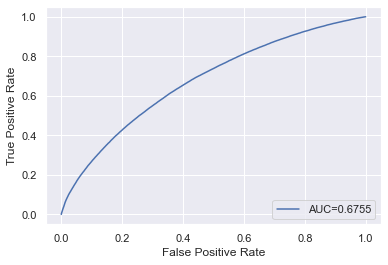

In [72]:

plot_roc(y_test, predicted_prob)

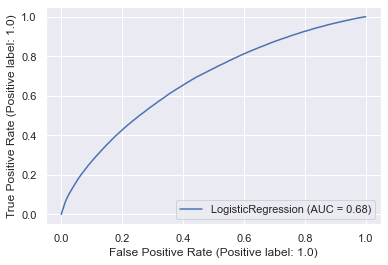

In [73]:
metrics.plot_roc_curve(clf2, x_test, y_test)

In [74]:
print(classification_report(y_test, clf2_predicton, target_names= ['Delayed', 'Not_Delayed']))

              precision    recall  f1-score   support

     Delayed       0.80      0.99      0.88    258823
 Not_Delayed       0.56      0.05      0.10     68295

    accuracy                           0.79    327118
   macro avg       0.68      0.52      0.49    327118
weighted avg       0.75      0.79      0.72    327118



Perform the evaluaion as you have done with the previous model and plot/show the same metrics

In [79]:
Conf_matxTest = confusion_matrix(y_test, clf2_predicton)

In [80]:
total=sum(sum(Conf_matxTest))

print ('Feature Engineering applied\n')

accuracytrain=metrics.accuracy_score(y_train, clf2_predicton_train) * 100
print ('Accuracy_traindata : ', accuracytrain)

accuracytest=metrics.accuracy_score(y_test, clf2_predicton)
print ('Accuracy_testdata : ', accuracytest)

sensitivity = Conf_matxTest[0,0]/(Conf_matxTest[0,0]+Conf_matxTest[0,1])
print('Sensitivity : ', sensitivity )

specificity = Conf_matxTest[1,1]/(Conf_matxTest[1,0]+Conf_matxTest[1,1])
print('Specificity : ', specificity)

F1_Score = Conf_matxTest[0,0]/(Conf_matxTest[0,0]+0.5*(Conf_matxTest[1,0]+Conf_matxTest[0,1]))
print('F1 Score : ', F1_Score)

Precision = (Conf_matxTest[0,0])/(Conf_matxTest[0,0]+ Conf_matxTest[1,0])
print('Precision : ', Precision)


Recall = (Conf_matxTest[0,0])/(Conf_matxTest[0,0]+ Conf_matxTest[0,1])

print('Recall : ', Recall)

Feature Engineering applied

Accuracy_traindata :  79.229131383782
Accuracy_testdata :  0.7937074694758466
Sensitivity :  0.988779977049953
Specificity :  0.05442565341533055
F1 Score :  0.883515155699786
Precision :  0.7985066942904302
Recall :  0.988779977049953


### Question: did you notice a difference by adding the extra data on the results?
After careful observation , there is not much of a difference between the metrics between the fitted model without feature Engineering and the one done with feature engineering applied. Only the Specificity has improved after the feature engineering is applied to the dataset by creating more variables. 
Specificity here means machine learning model's ability to designate the flight which does not get delayed as Not Delayed.
As the specificity increased the fitted model has evolved as the better version after feature engineering by improving the prediction of flights which are not getting delayed as not delayed. Even the confusion matrix proves the number of predictions for Not delayed flights has been increased in comparision to the first model.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

#### Here is the Tableau link for the dataset.

https://public.tableau.com/app/profile/ambika5764/viz/dataScience_u3227622/Dashboard1?publish=yes

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:



#### 1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
The business goal here was to classify the flights under 2 categories, delayed and not delayed based on various indicators. As the confusion matrx and AUC of the ROC are not showing great numbers here, we can still consider that the fitted model can be tuned for better performance. A ROC curve is a graph that displays how well a classification model performs across all thresholds. Currently the fitted model shous AUC=0.68. Several measures can be taken to improve the overall performance of the model here.
1. Outliers might have been handled in a better way.
2. We can improve class imbalance. By assigning class weights, by performing upward or downward sampling, we can improve the performance of classification models.
3. We can tune the parameters through GridSearch which automatically tunes the parameter.
4. We could do the correlation matrix implementation for feature selection.
5. We can also explore other classification models to check for better performance and improved metric values.

#### 2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
As already discussed above, the Specificity improvement helped in better classification of flights which are not getting delayed. So the changes made to the dataset by feature engineering yielded better performance of the machine learning model.
Cleaning the dataset by removing some of the missing value rows and replacing few by using mean also helped in having large data without loosing much information. Creating new features by joining weather information and adding holidays information also helped in better prediction. Feature extraction and selection helped in reducing noise in the dataset which gave good accuracy of 79%.


#### 3. What were some of the biggest challenges you encountered throughout this project?
1. As the dataset is huge, the challenge was to load the dataset.
2. The syntax of the python code as I was comfortable with R.

#### 4. What were the three most important things you learned about machine learning while completing this project?
1. Feature engineering importance in yielding better performance.
2. Problem solving using various dataset and merging.
3. Importance of Specificity and Area under the curve.

In [84]:
################################-------------------END--------------------######################################################